**Importing Necessary Libraries**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report


In [25]:
# Load the dataset
lung_cancer_data = pd.read_csv('/content/Lung_Cancer_Dataset for my reasurch proposle.csv')

# Display the first few rows of the dataset
lung_cancer_data.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [26]:
# Check for missing values
missing_values = lung_cancer_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Encode categorical variables
lung_cancer_data['GENDER'] = lung_cancer_data['GENDER'].map({'M': 0, 'F': 1})
lung_cancer_data['LUNG_CANCER'] = lung_cancer_data['LUNG_CANCER'].map({'NO': 0, 'YES': 1})

# Normalize or scale numerical features (if required)
# Example:
# lung_cancer_data['AGE'] = (lung_cancer_data['AGE'] - lung_cancer_data['AGE'].mean()) / lung_cancer_data['AGE'].std()


Missing Values:
 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


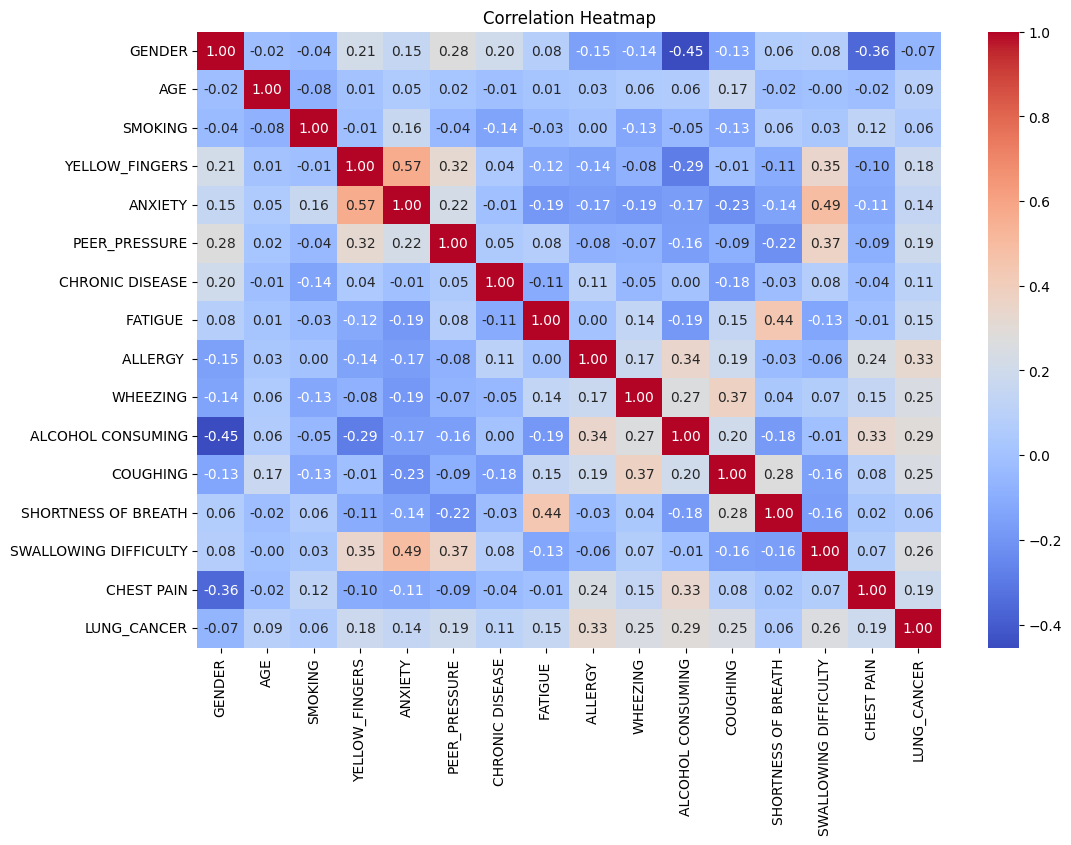

In [27]:
# Explore correlations
correlation_matrix = lung_cancer_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [28]:
# Perform appropriate statistical tests
# Example: Chi-square test for categorical variables
chi2_results = stats.chi2_contingency(pd.crosstab(lung_cancer_data['SMOKING'], lung_cancer_data['LUNG_CANCER']))
print("Chi-square Test Results:")
print("Chi-square statistic:", chi2_results[0])
print("p-value:", chi2_results[1])


Chi-square Test Results:
Chi-square statistic: 0.7225127713920805
p-value: 0.39532090950779786


In [29]:
# Use correlation analysis and statistical tests for feature selection
# Example: Selecting features with correlation greater than a threshold
selected_features = correlation_matrix[abs(correlation_matrix['LUNG_CANCER']) > 0.1].index.tolist()
print("Selected Features:", selected_features)


Selected Features: ['YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']


In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.052993370824139484


In [44]:
# Fit linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)

# Evaluate model
# Here you may need different evaluation metrics depending on the specifics of your problem
# For example, mean squared error (MSE) can be a suitable metric for regression tasks
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.052993370824139484


In [46]:
# Split data into train and test sets
X = lung_cancer_data[selected_features].drop(columns=['LUNG_CANCER'])
y = lung_cancer_data['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.967741935483871
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

